### Marketing Intelligence - Customer Segmentation
#### Group 8 - MBD

The data has been gathered through membership cards of a supermarket mall. We will analyze several customers' features, with the objective of identifying certain characteristics that will help us target our marketing efforts to each group effectively and appropriately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.offline as py

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
customer_data = pd.read_csv("./Mall_Customers.csv")

In [3]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
customer_data.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [5]:
customer_data.sample(5)

,CustomerID,Gender,Age,annual_income,spending_score
14,15,Male,37,20,13
144,145,Male,25,77,12
141,142,Male,32,75,93
58,59,Female,27,46,51
198,199,Male,32,137,18


#### Column Description:
- CustomerID:  unique identifier for each customer

- Gender: Female / Male

- Age: integer between 18 and 70

- annual_income: customer's annual income in thousands of USD

- spending_score: Score assigned by the mall based on customer behavior and spending nature

In [6]:
# No missing values:
customer_data.isna().sum()

CustomerID        0
Gender            0
Age               0
annual_income     0
spending_score    0
dtype: int64

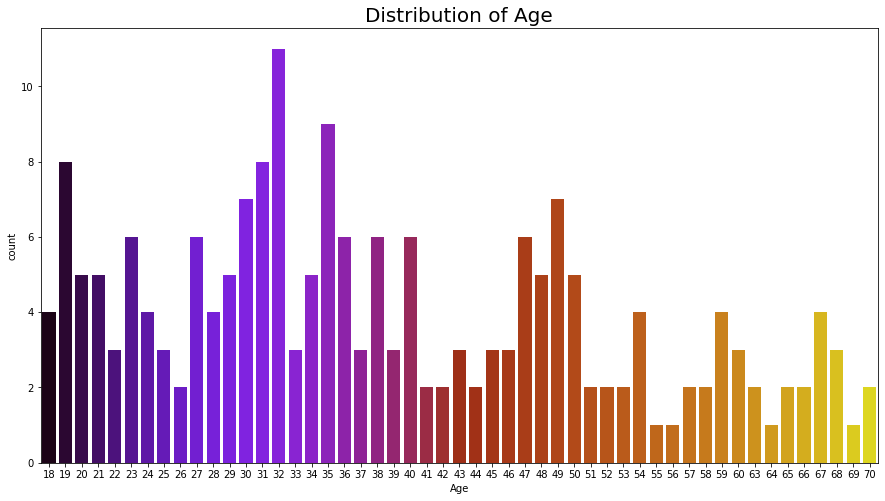

In [7]:
# Plotting the distribution for Age
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(customer_data['Age'], palette = 'gnuplot')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

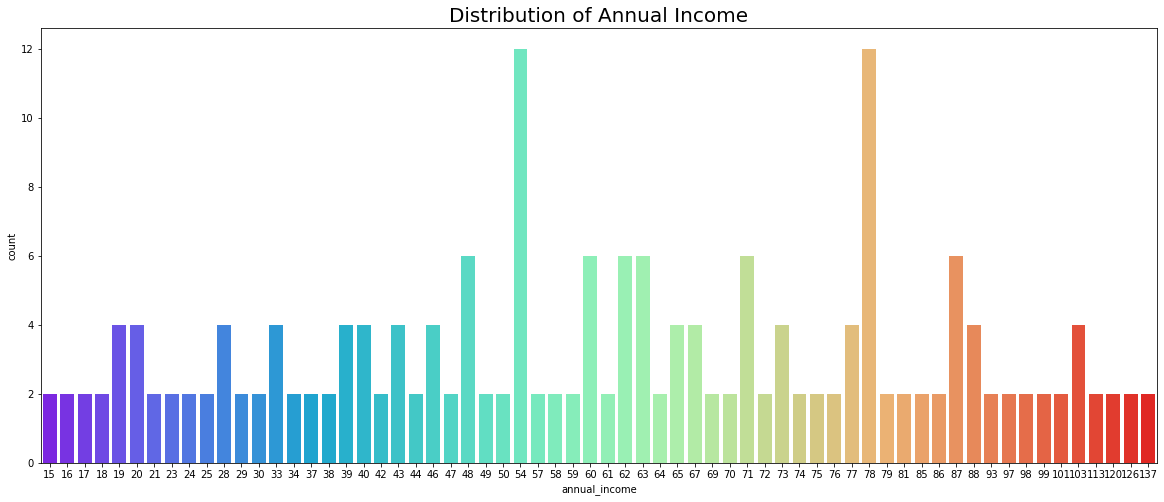

In [8]:
# Plotting the distribution for Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(customer_data['annual_income'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

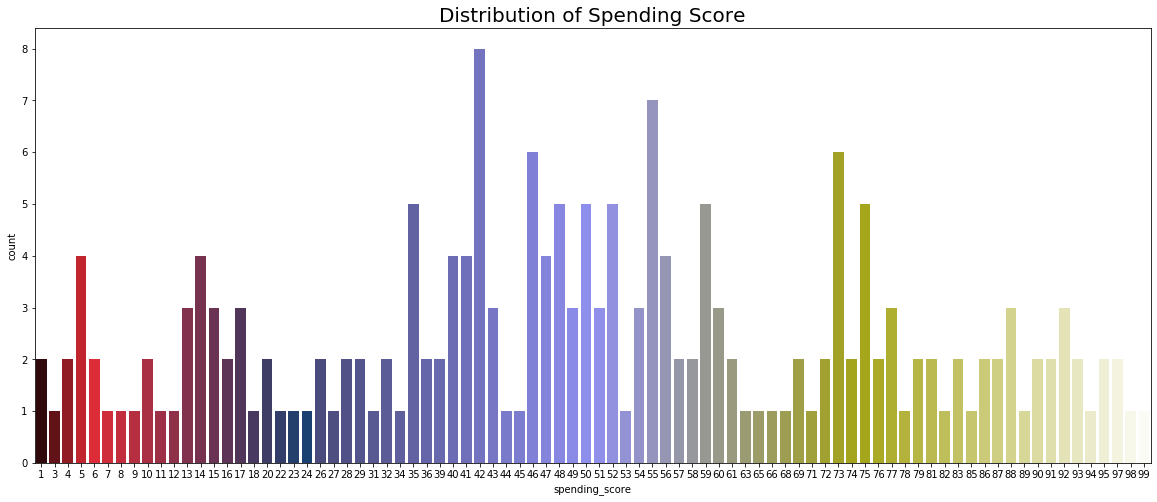

In [9]:
# Plotting the distribution for Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(customer_data['spending_score'], palette = 'gist_stern')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

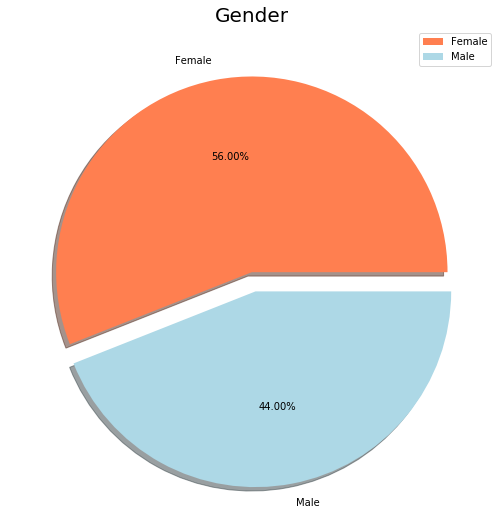

In [10]:
labels = ['Female', 'Male']
size = customer_data['Gender'].value_counts()
colors = ['coral', 'lightblue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

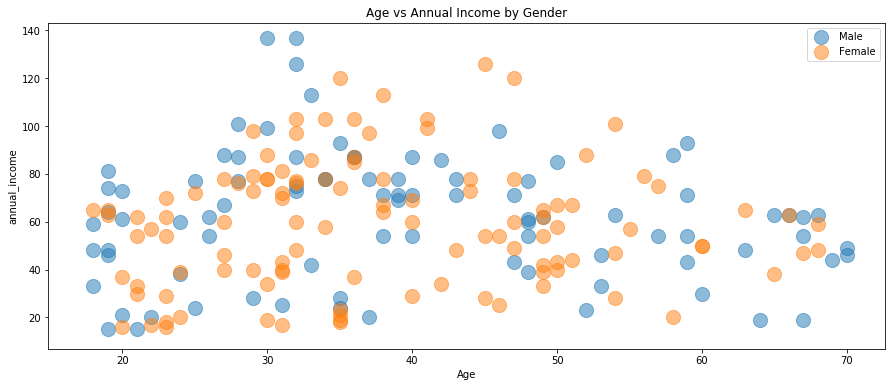

In [11]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'annual_income' , data = customer_data[customer_data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('annual_income') 
plt.title('Age vs Annual Income by Gender')
plt.legend()
plt.show()

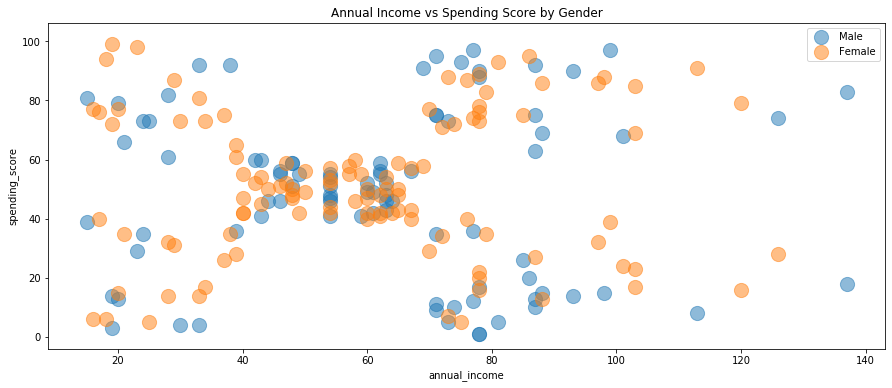

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'annual_income',y = 'spending_score' ,
                data = customer_data[customer_data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('annual_income'), plt.ylabel('spending_score') 
plt.title('Annual Income vs Spending Score by Gender')
plt.legend()
plt.show()

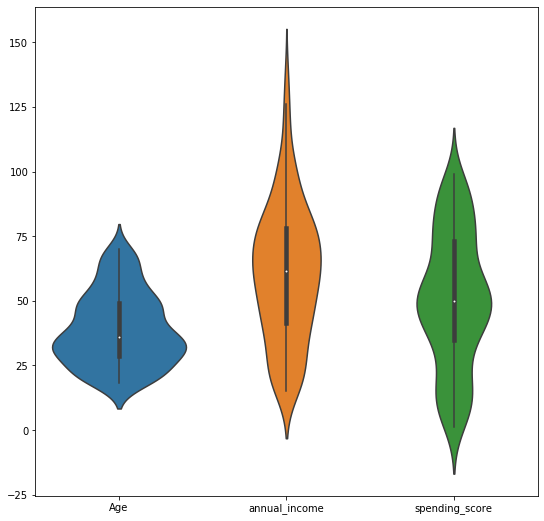

In [17]:
sns.violinplot(data=customer_data[['Age','annual_income','spending_score']])

Some important insights from the previous plots that could furtherly help us to understand our customer's distribution:

- Most regular customers around 30 to 35 years of age. Senior citizens are the less frequent customer segment.
- Highest distribution of Average annual income of customers around 50 to 78K USD.
- Significantly more Female customers than Male.
- Most customers have Spending Score in the range of 35-60. Some customers have scores with very extreme values, which shows that the mall caters to the variety of Customers with varying needs and requirements.
- Female customers have slightly higher presence in the top Spending Scores, while Male customers have slightly more presence in higher Annual Incomes, although at this point it doesn't really seem relevant.

## Clustering Analysis:

As a first step, we will use **K-means** clustering algorithm:

K-means is a type of unsupervised learning and one of the most popular methods of clustering unlabelled data into "k" number of clusters, we chose it because it is widely known and easy to understand.

One of the main challenges when using K-means is that you have to select the number of clusters (K) that you want to create. How do you find the optimal K?

We will use the **Elbow Method** which consists of plotting the Inertia (sum of squared errors (SSE) between centroids and datapoints for each cluster) as a function of different number of clusters (1 to 10 in this case). If the plot looks like an arm, then the Elbow in the arm will be the cut-off for the optimal K. The intuition behind this, is that adding more clusters after the cut-off will increase the complexity of the model, and will barely improve the modelling of the data.

### Annual Income / Spending Score
We will start by analyzing **Annual Income** and **Spending Score**, which are intuitevely in this case the most relevant attributes to determine the segments within customers of a Mall. 

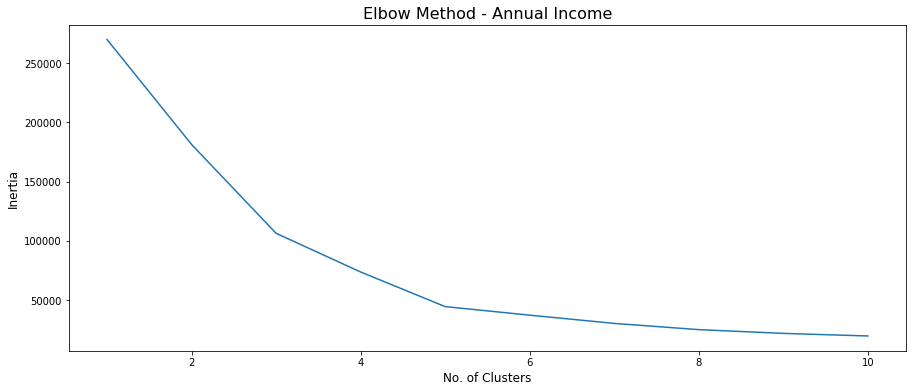

In [19]:
x = customer_data.iloc[:, [3, 4]].values
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    inertia.append(km.inertia_)

plt.figure(1 , figsize = (15 , 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method - Annual Income', fontsize = 16)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize = 12)
plt.show()

**Optimal K = 5**

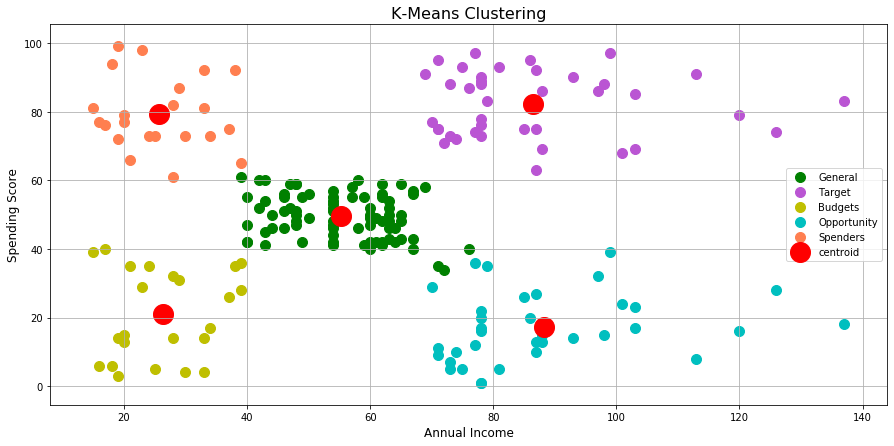

In [25]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'General')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'mediumorchid', label = 'Target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'y', label = 'Budgets')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'c', label = 'Opportunity')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'coral', label = 'Spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 400, c = 'red' , label = 'centroid')

plt.title('K-Means Clustering', fontsize = 16)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### Age / Spending Score
We will now analyze the segments conformed by age and spending score.

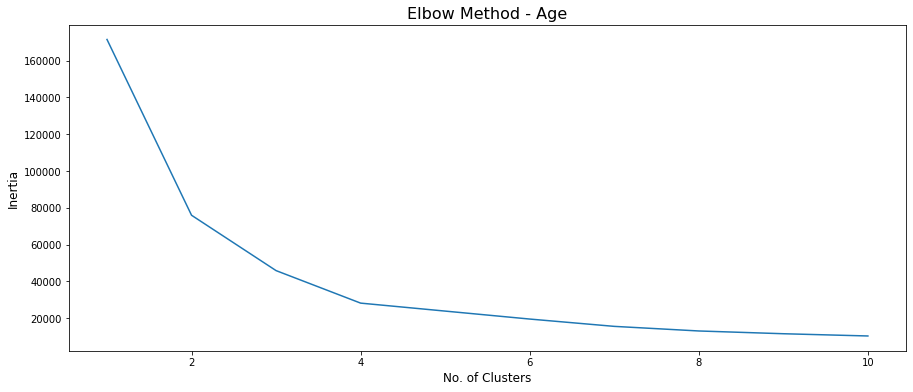

In [21]:
x1 = customer_data.iloc[:, [2, 4]].values
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x1)
    inertia.append(km.inertia_)

plt.figure(1 , figsize = (15 , 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method - Age', fontsize = 16)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize = 12)
plt.show()

**Optimal K = 4**

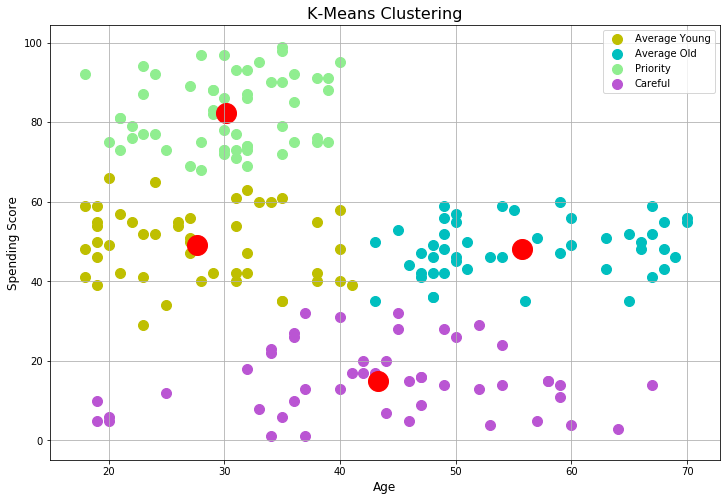

In [26]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(x1)

plt.figure(figsize=(12,8))
plt.scatter(x1[ymeans == 0, 0], x1[ymeans == 0, 1], s = 100, c = 'y', label = 'Average Young')
plt.scatter(x1[ymeans == 1, 0], x1[ymeans == 1, 1], s = 100, c = 'c', label = 'Average Old')
plt.scatter(x1[ymeans == 2, 0], x1[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Priority')
plt.scatter(x1[ymeans == 3, 0], x1[ymeans == 3, 1], s = 100, c = 'mediumorchid', label = 'Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'red')

plt.title('K-Means Clustering', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

### All Together:

In [34]:
x2 = customer_data[['Age', 'spending_score', 'annual_income']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x2)
labels = km.labels_
centroids = km.cluster_centers_

In [35]:
customer_data['labels'] =  labels
trace1 = go.Scatter3d(
    x= customer_data['Age'],
    y= customer_data['spending_score'],
    z= customer_data['annual_income'],
    mode='markers',
     marker=dict(
        color = customer_data['labels'], 
        size= 10,
        line=dict(
            color= customer_data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Income vs Spending vs Age',
    margin=dict(
        l=0,
        r=75,
        b=0,
        t=60  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [41]:
customer_data['labels'].unique()

array([0, 4, 1, 2, 3])

In [37]:
centroids

array([[45.2173913 , 20.91304348, 26.30434783],
       [43.08860759, 49.56962025, 55.29113924],
       [32.69230769, 82.12820513, 86.53846154],
       [40.66666667, 17.58333333, 87.75      ],
       [25.52173913, 78.56521739, 26.30434783]])

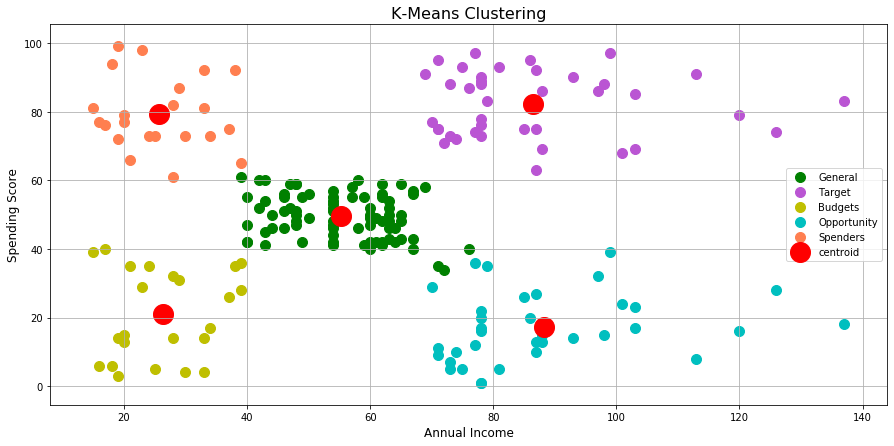

In [42]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'General')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'mediumorchid', label = 'Target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'y', label = 'Budgets')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'c', label = 'Opportunity')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'coral', label = 'Spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 400, c = 'red' , label = 'centroid')

plt.title('K-Means Clustering', fontsize = 16)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

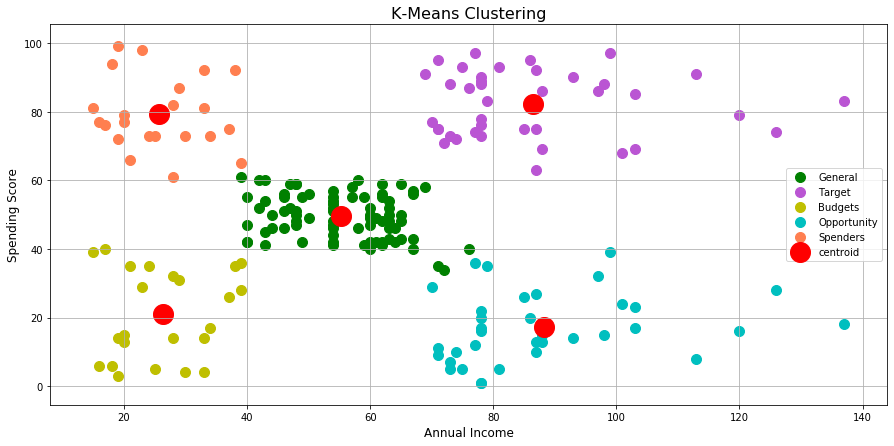

In [47]:
plt.figure(figsize=(15,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'General')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'mediumorchid', label = 'Target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'y', label = 'Budgets')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'c', label = 'Opportunity')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'coral', label = 'Spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 400, c = 'red' , label = 'centroid')

plt.title('K-Means Clustering', fontsize = 16)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

In [49]:
customer_data['Mkt_Group'] = customer_data['labels']

In [53]:
customer_data['labels'] = customer_data['labels'].apply(lambda x: str(x).replace('0','General'))
customer_data['labels'] = customer_data['labels'].apply(lambda x: str(x).replace('1','Target'))
customer_data['labels'] = customer_data['labels'].apply(lambda x: str(x).replace('2','Budget'))
customer_data['labels'] = customer_data['labels'].apply(lambda x: str(x).replace('3','Oportunity'))
customer_data['labels'] = customer_data['labels'].apply(lambda x: str(x).replace('4','Spenders'))

In [57]:
customer_data['labels'].value_counts()/len(customer_data)*100

Target        39.5
Budget        19.5
Oportunity    18.0
General       11.5
Spenders      11.5
Name: labels, dtype: float64

In [63]:
y_means

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [69]:
centroids

array([[45.2173913 , 20.91304348, 26.30434783],
       [43.08860759, 49.56962025, 55.29113924],
       [32.69230769, 82.12820513, 86.53846154],
       [40.66666667, 17.58333333, 87.75      ],
       [25.52173913, 78.56521739, 26.30434783]])

In [71]:
column_names = ['Age', 'spending_score', 'annual_income']

In [73]:
df_centroids = pd.DataFrame(centroids,columns=column_names)

In [75]:
df_centroids['Mkt_Group'] = df_centroids.index

In [78]:
df_centroids = df_centroids[['Mkt_Group','Age','spending_score','annual_income']]

In [80]:
df_centroids.rename(columns={'Age': 'Centroid_Age', 'spending_score': 'Centroid_spending_score','annual_income': 'Centroid_annual_income'}, inplace=True)

In [82]:
customer_data.head(3)

,CustomerID,Gender,Age,annual_income,spending_score,labels,Mkt_Group
0,1,Male,19,15,39,General,0
1,2,Male,21,15,81,Spenders,4
2,3,Female,20,16,6,General,0


In [81]:
df_centroids

,Mkt_Group,Centroid_Age,Centroid_spending_score,Centroid_annual_income
0,0,45.217391,20.913043,26.304348
1,1,43.088608,49.569620,55.291139
2,2,32.692308,82.128205,86.538462
3,3,40.666667,17.583333,87.750000
4,4,25.521739,78.565217,26.304348


In [233]:
df_final = pd.merge(customer_data,df_centroids,left_on='Mkt_Group',right_on='Mkt_Group',how='inner')

In [234]:
df_final.head(3)

,CustomerID,Gender,Age,annual_income,spending_score,labels,Mkt_Group,Centroid_Age,Centroid_spending_score,Centroid_annual_income
0,1,Male,19,15,39,General,0,45.217391,20.913043,26.304348
1,3,Female,20,16,6,General,0,45.217391,20.913043,26.304348
2,5,Female,31,17,40,General,0,45.217391,20.913043,26.304348


In [235]:
a = list(df_final.mean()[['Age','annual_income','spending_score']])

In [236]:
df_agg = df_final.groupby('labels')['Age','annual_income','spending_score'].mean()

In [237]:
df_agg.reset_index(level=0, inplace=True)

In [238]:
df_agg

,labels,Age,annual_income,spending_score
0,Budget,32.692308,86.538462,82.128205
1,General,45.217391,26.304348,20.913043
2,Oportunity,40.666667,87.750000,17.583333
3,Spenders,25.521739,26.304348,78.565217
4,Target,43.088608,55.291139,49.569620


In [239]:
a

[38.85, 60.56, 50.2]

In [240]:
df_agg.loc[len(df_agg)] = ['AVERAGES',38.85,60.56,50.2]

In [241]:
df_agg

,labels,Age,annual_income,spending_score
0,Budget,32.692308,86.538462,82.128205
1,General,45.217391,26.304348,20.913043
2,Oportunity,40.666667,87.750000,17.583333
3,Spenders,25.521739,26.304348,78.565217
4,Target,43.088608,55.291139,49.569620
5,AVERAGES,38.850000,60.560000,50.200000


In [242]:
a[0]

38.85

In [243]:
diff_age_avg= (df_agg['Age'] - a[0])/a[0] * 100

In [244]:
diff_age_avg

0   -15.849916
1    16.389682
2     4.676105
3   -34.306978
4    10.910187
5     0.000000
Name: Age, dtype: float64

In [245]:
df_agg['diff_age_avg'] = (df_agg['Age'] - a[0])/a[0] * 100
df_agg['diff_income_avg'] = (df_agg['annual_income'] - a[1])/a[1] * 100
df_agg['diff_spending_avg'] = (df_agg['spending_score'] - a[2])/a[2] * 100

In [246]:
df_agg

,labels,Age,annual_income,spending_score,diff_age_avg,diff_income_avg,diff_spending_avg
0,Budget,32.692308,86.538462,82.128205,-15.849916,42.897063,63.602002
1,General,45.217391,26.304348,20.913043,16.389682,-56.564815,-58.340551
2,Oportunity,40.666667,87.750000,17.583333,4.676105,44.897622,-64.973440
3,Spenders,25.521739,26.304348,78.565217,-34.306978,-56.564815,56.504417
4,Target,43.088608,55.291139,49.569620,10.910187,-8.700232,-1.255737
5,AVERAGES,38.850000,60.560000,50.200000,0.000000,0.000000,0.000000


In [247]:
pop = pd.DataFrame(customer_data['labels'].value_counts()/len(customer_data)*100)

In [248]:
pop.rename(columns={'labels': '% Pop'},inplace=True)

In [249]:
pop.reset_index(level=0, inplace=True)

In [250]:
pop.rename(columns={'index': 'labels'},inplace=True)

In [251]:
pop

,labels,% Pop
0,Target,39.5
1,Budget,19.5
2,Oportunity,18.0
3,General,11.5
4,Spenders,11.5


In [252]:
df_agg = pd.merge(df_agg,pop,on='labels',how='outer')

In [253]:
df_agg

,labels,Age,annual_income,spending_score,diff_age_avg,diff_income_avg,diff_spending_avg,% Pop
0,Budget,32.692308,86.538462,82.128205,-15.849916,42.897063,63.602002,19.5
1,General,45.217391,26.304348,20.913043,16.389682,-56.564815,-58.340551,11.5
2,Oportunity,40.666667,87.750000,17.583333,4.676105,44.897622,-64.973440,18.0
3,Spenders,25.521739,26.304348,78.565217,-34.306978,-56.564815,56.504417,11.5
4,Target,43.088608,55.291139,49.569620,10.910187,-8.700232,-1.255737,39.5
5,AVERAGES,38.850000,60.560000,50.200000,0.000000,0.000000,0.000000,NaN


In [254]:
df_agg[df_agg['labels']=='Target']

,labels,Age,annual_income,spending_score,diff_age_avg,diff_income_avg,diff_spending_avg,% Pop
4,Target,43.088608,55.291139,49.56962,10.910187,-8.700232,-1.255737,39.5


Target is our biggest cluster. Our Target cluster is 10,9% older than the mean, has 8,7% less income and very similar spending score.

In [256]:
df_agg[df_agg['labels']=='Oportunity']

,labels,Age,annual_income,spending_score,diff_age_avg,diff_income_avg,diff_spending_avg,% Pop
2,Oportunity,40.666667,87.75,17.583333,4.676105,44.897622,-64.97344,18.0


Our Oportunity cluster is slightly older than average but has 45% more income than average.

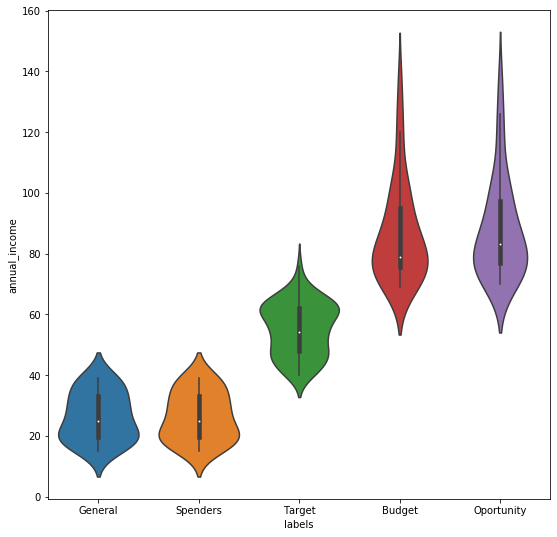

In [273]:
sns.violinplot(y='annual_income',x='labels',data=df_final)

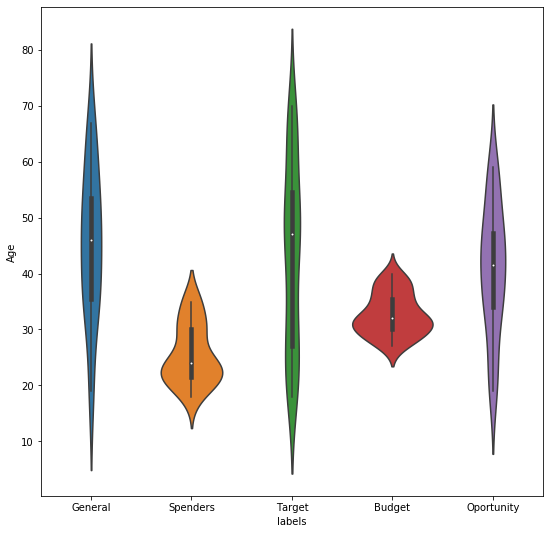

In [274]:
sns.violinplot(y='Age',x='labels',data=df_final)

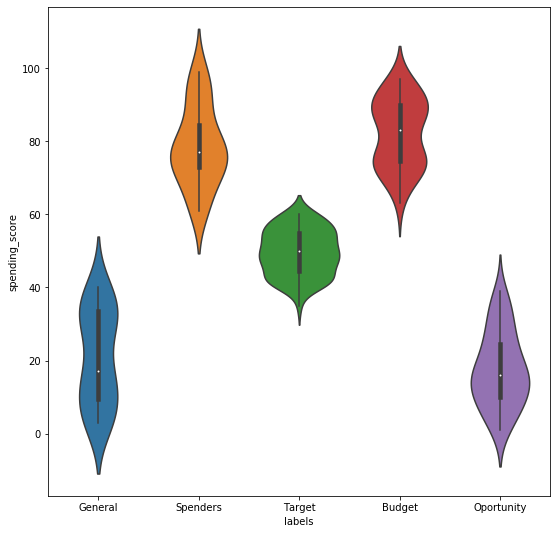

In [275]:
sns.violinplot(y='spending_score',x='labels',data=df_final)